In [10]:
import xarray as xr
import cfr

In [12]:
ds = cfr.ClimateField().fetch('20CRv3/tas', return_ds=True)
ds

>>> The target file seems existed at: ./data/air.2m.mon.mean.nc . Loading from it instead of downloading ...


<xarray.Dataset>
Dimensions:    (lat: 181, lon: 360, time: 2160, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time       (time) object 1836-01-01 00:00:00 ... 2015-12-01 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    air        (time, lat, lon) float32 ...
Attributes: (12/24)
    Conventions:               CF-1.2
    title:                     Monthly NOAA/CIRES/DOE 20th Century Reanalysis V3
    comments:                  Data are from \nNOAA/CIRES/DOE 20th Century Re...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   These data are available free of charge under ...
    spatial_resolution:        1.0 degree
    ...                        ...
    citation1:                 Slivinski, L. C, G. P. Compo, J. S. Whitaker, ...
    References:                https://www.psl.noaa.gov/data/gridded/data.20t...
    creator_name:              NOAA/PSL
    institution:               NOAA Physical Sciences Laboratory & CU/CIRES \...
    contact:                   psl.data@noaa.gov
    citation:                  Compo,G.P. <https://www.psl.noaa.gov/people/gi...

In [14]:
da = ds['air']
da

<xarray.DataArray 'air' (time: 2160, lat: 181, lon: 360)>
[140745600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 1836-01-01 00:00:00 ... 2015-12-01 00:00:00
Attributes: (12/15)
    long_name:         Monthly Air Temperature at 2 m
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             degK
    GRIB_name:         TMP
    var_desc:          Air temperature
    dataset:           NOAA/CIRES/DOE 20th Century Reanalysis version 3si-mo ...
    ...                ...
    standard_name:     air_temperature
    valid_range:       [100. 500.]
    statistic_method:  Ensemble mean is calculated by averaging over all 80 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [213.11884 316.28433]

In [17]:
da_out = da.mean('time', keep_attrs=True)
da_out

<xarray.DataArray 'air' (lat: 181, lon: 360)>
array([[232.62236, 232.62236, 232.62236, ..., 232.62236, 232.62236,
        232.62236],
       [232.93562, 232.92255, 232.90932, ..., 232.97322, 232.96082,
        232.9482 ],
       [233.02043, 232.97849, 232.93764, ..., 233.17435, 233.12233,
        233.07047],
       ...,
       [257.07626, 257.0815 , 257.08615, ..., 257.05408, 257.06158,
        257.06888],
       [256.9212 , 256.92313, 256.9247 , ..., 256.9132 , 256.916  ,
        256.91843],
       [256.8098 , 256.8098 , 256.8098 , ..., 256.8098 , 256.8098 ,
        256.8098 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes: (12/15)
    long_name:         Monthly Air Temperature at 2 m
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             degK
    GRIB_name:         TMP
    var_desc:          Air temperature
    dataset:           NOAA/CIRES/DOE 20th Century Reanalysis version 3si-mo ...
    ...                ...
    standard_name:     air_temperature
    valid_range:       [100. 500.]
    statistic_method:  Ensemble mean is calculated by averaging over all 80 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [213.11884 316.28433]

>>> The target file seems existed at: ./data/air.2m.mon.mean.nc . Loading from it instead of downloading ...


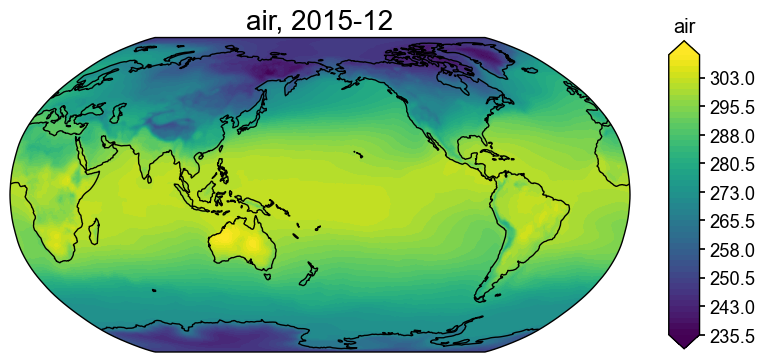

In [18]:
fd = cfr.ClimateField().fetch('20CRv3/tas', vn='air')
fig, ax = fd[-1].plot()

In [19]:
fd_DJF_ann = fd.annualize(months=[12, 1, 2])
fd_DJF_ann.da

<xarray.DataArray 'air' (time: 181, lat: 181, lon: 360)>
array([[[241.27834, 241.27834, 241.27834, ..., 241.27834, 241.27834,
         241.27834],
        [241.63933, 241.62373, 241.60962, ..., 241.67535, 241.66052,
         241.65143],
        [241.86505, 241.82776, 241.78574, ..., 242.00128, 241.95187,
         241.90952],
        ...,
        [241.46164, 241.46838, 241.47284, ..., 241.43837, 241.44759,
         241.45453],
        [241.28314, 241.28586, 241.28674, ..., 241.2735 , 241.27707,
         241.28041],
        [241.1747 , 241.1747 , 241.1747 , ..., 241.1747 , 241.1747 ,
         241.1747 ]],

       [[242.79997, 242.79997, 242.79997, ..., 242.79997, 242.79997,
         242.79997],
        [243.1856 , 243.17053, 243.1545 , ..., 243.22314, 243.21016,
         243.1967 ],
        [243.39888, 243.36232, 243.32616, ..., 243.52504, 243.48448,
         243.44243],
...
        [248.54814, 248.5658 , 248.58247, ..., 248.49107, 248.50761,
         248.52946],
        [248.26556, 248.27287, 248.28058, ..., 248.23962, 248.24785,
         248.25597],
        [248.12672, 248.12672, 248.12672, ..., 248.12672, 248.12672,
         248.12672]],

       [[248.58467, 248.58467, 248.58467, ..., 248.58467, 248.58467,
         248.58467],
        [249.2536 , 249.24072, 249.22662, ..., 249.28911, 249.27904,
         249.26653],
        [249.66452, 249.63425, 249.61409, ..., 249.75404, 249.72542,
         249.69354],
        ...,
        [247.84918, 247.85927, 247.87419, ..., 247.79878, 247.81813,
         247.83426],
        [247.5238 , 247.52663, 247.52943, ..., 247.5117 , 247.51894,
         247.5214 ],
        [247.36772, 247.36772, 247.36772, ..., 247.36772, 247.36772,
         247.36772]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) int64 1836 1837 1838 1839 1840 ... 2012 2013 2014 2015 2016
Attributes: (12/16)
    long_name:         Monthly Air Temperature at 2 m
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             degK
    GRIB_name:         TMP
    var_desc:          Air temperature
    dataset:           NOAA/CIRES/DOE 20th Century Reanalysis version 3si-mo ...
    ...                ...
    valid_range:       [100. 500.]
    statistic_method:  Ensemble mean is calculated by averaging over all 80 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [213.11884 316.28433]
    annualized:        1

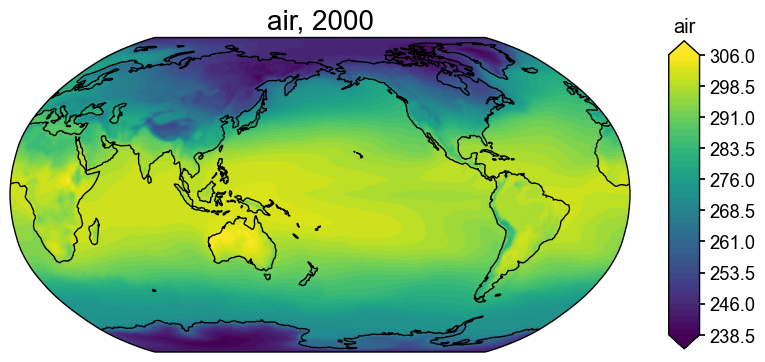

In [22]:
fig, ax = fd_DJF_ann['2000'].plot()